In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

https://chat.openai.com/share/11bc30d3-8c9b-42c4-af10-cbc7567e9b4c

In [2]:
sco_books = pd.read_csv('../data/SCoData_books_v1.2_2022_01.csv', encoding='utf-8', dtype={'year': 'Int32'})
sco_books.sample(5)

,uri,title,author,editor,translator,introduction,illustrator,photographer,year,format,uncertain,ebook_url,volumes_issues,notes,event_count,borrow_count,purchase_count,circulation_years,updated
3762,https://shakespeareandco.princeton.edu/books/h...,Bernard Shaw: Playboy and Prophet,"Henderson, Archibald",NaN,NaN,NaN,NaN,NaN,1932,Book,False,https://archive.org/details/georgebernards00hend,NaN,NaN,1,1,0,1937,2021-03-25T21:13:55+00:00
3311,https://shakespeareandco.princeton.edu/books/d...,Roper's Row,"Deeping, Warwick",NaN,NaN,NaN,NaN,NaN,1929,Book,False,NaN,NaN,NaN,2,2,0,1929;1930,2020-04-30T19:40:17+00:00
2569,https://shakespeareandco.princeton.edu/books/v...,Excavations: A Book of Advocacies,"Van Vechten, Carl",NaN,NaN,NaN,NaN,NaN,1926,Book,False,NaN,NaN,NaN,2,2,0,1926,2020-04-30T19:40:21+00:00
5186,https://shakespeareandco.princeton.edu/books/c...,Ten Little Niggers,"Christie, Agatha",NaN,NaN,NaN,NaN,NaN,1939,Book,False,NaN,NaN,NaN,9,8,0,1939;1940;1941,2020-04-30T19:40:19+00:00
1876,https://shakespeareandco.princeton.edu/books/w...,Jacob's Room,"Woolf, Virginia",NaN,NaN,NaN,NaN,NaN,1922,Book,False,https://archive.org/details/JacobsRoom/mode/2up,NaN,NaN,26,24,0,1922;1923;1924;1925;1926;1927;1928;1929;1930;1...,2020-08-19T21:57:43+00:00


In [3]:
ban_books = pd.read_csv('../data/banned_books.csv', encoding='utf-8', dtype={'date_banned': 'Int32'})
ban_books.sample(5)

,title,author,viaf_url,country,date_banned,source,note
233,The Complete Works of Ralph Waldo Emerson: Com...,"Emerson, Ralph Waldo",http://viaf.org/viaf/27079964,NaN,<NA>,NaN,Banned from Harvard
57,My Fight for Birth Control,"Sanger, Margaret",http://viaf.org/viaf/64013684,Ireland,1953,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,Contraception
86,Tobacco Road,"Caldwell, Erskine Preston",http://viaf.org/viaf/46758305,USA,1935,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,Banned in many cities
146,Little Essays of Love or Virtue,"Ellis, Havelock",http://viaf.org/viaf/41861098,Ireland,1922,https://archive.org/details/sim_saturday-revie...,NaN
63,Elmer Gantry,"Lewis, Sinclair",http://viaf.org/viaf/39380311,Ireland,1929,https://babel.hathitrust.org/cgi/pt?id=mdp.390...,NaN


In [4]:
ban_books.columns

Index(['title', 'author', 'viaf_url', 'country', 'date_banned', 'source',
       'note'],
      dtype='object')

In [5]:
ban_books.shape

(253, 7)

In [6]:
ban_books_aut = ban_books[['author']]
ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)
ban_books_aut

C:\Users\dittm\AppData\Local\Temp\ipykernel_11360\3768331347.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ban_books_aut.rename(columns={'author':'ban_author'}, inplace=True)


,ban_author
0,Aristophanes
1,Ovid
2,"Apuleius, Lucius"
3,"Shakespeare, William"
4,"Shakespeare, William"
...,...
248,"Lofting, Hugh"
249,"Dos Passos, John"
250,"Aragon, Louis"
251,"Stalin, Joseph"


In [7]:
ban_books_aut_unique = ban_books_aut.drop_duplicates()
ban_books_aut_unique.sample(10)

,ban_author
22,"Tolstoy, Leo"
199,"Newman, Frances"
154,"Hardy, Thomas"
234,Jack London
186,"Schreiner, Olive"
20,"Baudelaire, Charles"
152,"Eliot, T. S."
68,"O'Neill, Eugene"
215,"Garnett, Edward"
239,NaN


In [8]:
ban_books_aut_unique.shape

(184, 1)

In [9]:
sco_books_aut = sco_books[sco_books['format'] == 'Book'][['author', 'title', 'format', 'year', 'borrow_count']].dropna()
sco_books_aut.rename(columns={'author':'sco_author'}, inplace=True)
sco_books_aut = sco_books_aut[~sco_books_aut['sco_author'].str.contains(';')] # ~ negates condition
sco_books_aut = sco_books_aut[(sco_books_aut['year'] >= 1919) & (sco_books_aut['year'] <= 1941)] # book published between 1919 and 1941
# sco_books_aut = sco_books_aut[(sco_books_aut['borrow_count'] >= 0)]
sco_books_aut.shape

(3512, 5)

In [10]:
sco_books_aut.columns

Index(['sco_author', 'title', 'format', 'year', 'borrow_count'], dtype='object')

In [11]:
sco_books_aut.sample(10)

,sco_author,title,format,year,borrow_count
3952,"Barker, George",Alanna Autumnal,Book,1933,1
1957,"Gibbs, Philip",The Middle of the Road,Book,1922,3
4507,"Hopkins, Gerard Manley",The Letters of Gerard Manley Hopkins to Robert...,Book,1935,10
2824,"Mirrlees, Hope",Lud-in-the-Mist,Book,1927,2
3826,"Golding, Louis",Magnolia Street,Book,1932,12
4397,"Baring, Maurice",Darby and Joan,Book,1935,3
4671,"Walling, R. A. J.",The Corpse in the Crimson Slippers,Book,1936,5
1778,"Lawrence, D. H.",Psychoanalysis and the Unconscious,Book,1921,4
1530,"Babbitt, Irving",Rousseau and Romanticism,Book,1919,2
2159,"Smith, Sidney",Andy Gump,Book,1924,1


Check how many books per author are in the dataset

In [12]:
sco_filter = sco_books_aut.loc[sco_books_aut['sco_author'] == 'Hemingway, Ernest']
sco_filter

,sco_author,title,format,year,borrow_count
2140,"Hemingway, Ernest",Three Stories and Ten Poems,Book,1923,1
2731,"Hemingway, Ernest",The Sun Also Rises,Book,1926,27
2735,"Hemingway, Ernest",The Torrents of Spring,Book,1926,2
2826,"Hemingway, Ernest",Men without Women,Book,1927,26
3216,"Hemingway, Ernest",A Farewell to Arms,Book,1929,25
3780,"Hemingway, Ernest",Death in the Afternoon,Book,1932,22
4160,"Hemingway, Ernest",Winner Take Nothing,Book,1933,20
4418,"Hemingway, Ernest",Green Hills of Africa,Book,1935,8
4927,"Hemingway, Ernest",To Have and Have Not,Book,1937,23
5061,"Hemingway, Ernest",The Fifth Column and the First Forty-Nine Stories,Book,1938,14


In [13]:
merged_df = pd.merge(ban_books_aut_unique, sco_books_aut, how='inner', left_on='ban_author', right_on='sco_author')

intersection_df = merged_df[~(merged_df['ban_author'].isna() | merged_df['sco_author'].isna())]
intersection_df.reset_index(drop=True, inplace=True)

intersection_df = intersection_df[['sco_author', 'ban_author']]

intersection_df.shape

(705, 2)

In [14]:
intersection_df.head(10)

,sco_author,ban_author
0,"Shakespeare, William","Shakespeare, William"
1,"Shakespeare, William","Shakespeare, William"
2,"Andersen, Hans Christian","Andersen, Hans Christian"
3,"Whitman, Walt","Whitman, Walt"
4,"Baudelaire, Charles","Baudelaire, Charles"
5,"Tolstoy, Leo","Tolstoy, Leo"
6,"Tolstoy, Leo","Tolstoy, Leo"
7,"Twain, Mark","Twain, Mark"
8,"Twain, Mark","Twain, Mark"
9,"Swinburne, Algernon Charles","Swinburne, Algernon Charles"


Top banned authors per books

In [15]:
duplicate_counts = intersection_df.groupby(['sco_author', 'ban_author']).size()

sorted_duplicate_counts = duplicate_counts.sort_values(ascending=False)

top_20_duplicates = sorted_duplicate_counts.head(20)


Top authors per books

In [16]:
total_books = sco_books_aut.groupby(['sco_author']).size()

sorted_total_books = total_books.sort_values(ascending=False)

top_20_total_duplicates = sorted_total_books.head(20)

top_20_total_duplicates


sco_author
Lawrence, D. H.           34
Walpole, Hugh             26
Huxley, Aldous            25
Wells, H. G.              23
Mackenzie, Compton        22
Maugham, W. Somerset      21
Galsworthy, John          20
Eliot, T. S.              20
Fletcher, Joseph Smith    20
Yeats, William Butler     19
Woolf, Virginia           17
Bennett, Arnold           16
Russell, Bertrand         16
Christie, Agatha          16
Wodehouse, P. G.          16
Kaye-Smith, Sheila        15
Stern, G. B.              15
Chesterton, G. K.         15
Young, Francis Brett      15
Ford, Ford Madox          14
dtype: int64

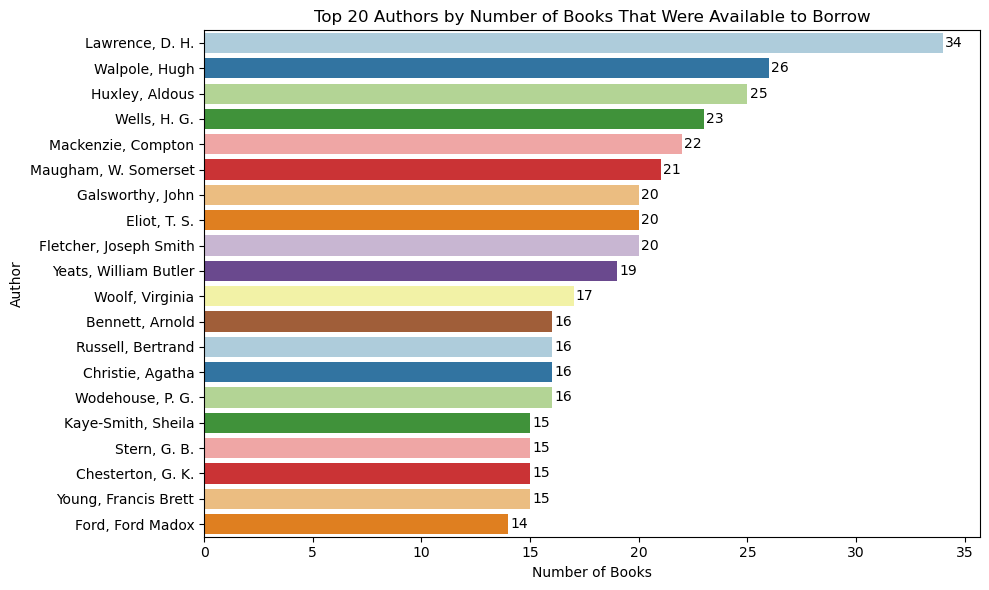

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_total_duplicates.values, y=top_20_total_duplicates.index, palette='Paired', orient='h')

# Add annotations
for index, value in enumerate(top_20_total_duplicates.values):
    plt.text(value + 0.1, index, str(value), ha='left', va='center')

plt.title('Top 20 Authors by Number of Books That Were Available to Borrow')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

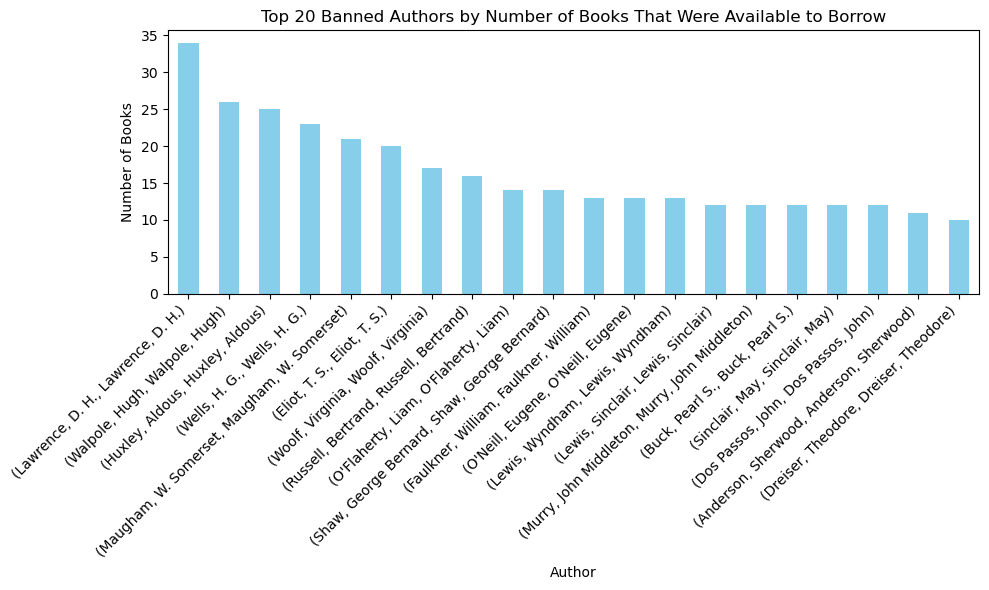

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
top_20_duplicates.plot(kind='bar', color='skyblue')
plt.title('Top 20 Banned Authors by Number of Books That Were Available to Borrow')
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ratio of banned authors within the first dataset: 0.20074031890660593


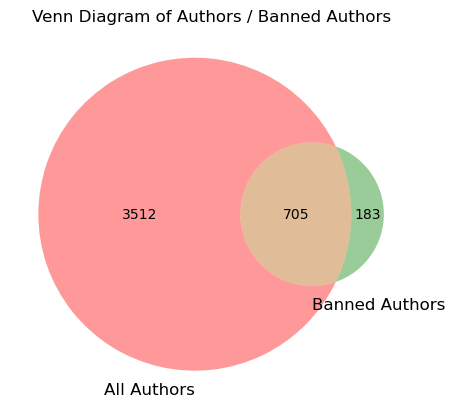

In [19]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Count occurrences of each author in both datasets
sco_authors_count = sco_books_aut['sco_author'].value_counts()
ban_authors_count = ban_books_aut_unique['ban_author'].value_counts()

# Find authors whose works were banned within the first dataset
banned_authors_in_dataset1 = set(sco_authors_count.index).intersection(set(ban_authors_count.index))

# Calculate the total count of authors in dataset 1
total_authors_in_dataset1 = sum(sco_authors_count)

# Calculate the total count of banned authors in dataset 1
total_banned_authors_in_dataset1 = sum(sco_authors_count[author] for author in banned_authors_in_dataset1)

# Calculate the ratio of banned authors within the first dataset
ratio_banned_authors = total_banned_authors_in_dataset1 / total_authors_in_dataset1

print("Ratio of banned authors within the first dataset:", ratio_banned_authors)

venn2(subsets=(total_authors_in_dataset1, len(ban_authors_count), total_banned_authors_in_dataset1), 
      set_labels=('All Authors', 'Banned Authors'))

plt.title('Venn Diagram of Authors / Banned Authors')
plt.show()

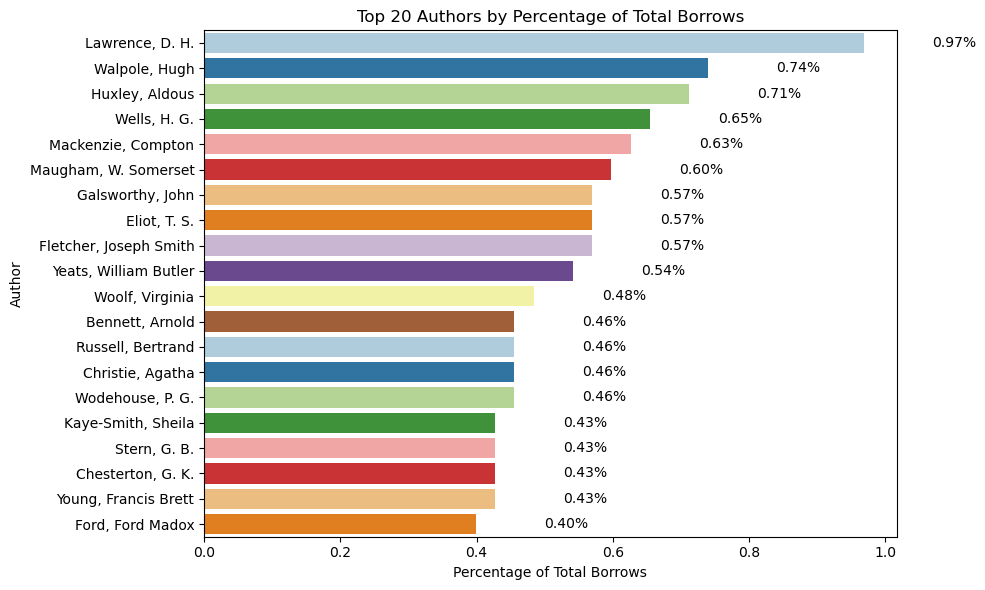

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sco_books_aut is your DataFrame and it contains a 'sco_author' column

# Calculate total books borrowed by each author
total_books = sco_books_aut.groupby(['sco_author']).size()

# Sort authors by the number of books borrowed in descending order
sorted_total_books = total_books.sort_values(ascending=False)

# Get the top 20 authors by the number of books borrowed
top_20_total_duplicates = sorted_total_books.head(20)

# Calculate the percentage of total borrows for each of the top 20 authors
total_borrows = total_books.sum()
top_20_percentage = (top_20_total_duplicates / total_borrows) * 100

# Plotting the data
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_percentage.values, y=top_20_percentage.index, palette='Paired', orient='h')

# Add annotations
for index, value in enumerate(top_20_percentage.values):
    plt.text(value + 0.1, index, f'{value:.2f}%', ha='left', va='center')

plt.title('Top 20 Authors by Percentage of Total Borrows')
plt.xlabel('Percentage of Total Borrows')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

Lawrence, D. H.: 0.97%
Walpole, Hugh: 0.74%
Huxley, Aldous: 0.71%
Wells, H. G.: 0.65%
Mackenzie, Compton: 0.63%
Maugham, W. Somerset: 0.60%
Galsworthy, John: 0.57%
Eliot, T. S.: 0.57%
Fletcher, Joseph Smith: 0.57%
Yeats, William Butler: 0.54%
Woolf, Virginia: 0.48%
Bennett, Arnold: 0.46%
Russell, Bertrand: 0.46%
Christie, Agatha: 0.46%
Wodehouse, P. G.: 0.46%
Kaye-Smith, Sheila: 0.43%
Stern, G. B.: 0.43%
Chesterton, G. K.: 0.43%
Young, Francis Brett: 0.43%
Ford, Ford Madox: 0.40%


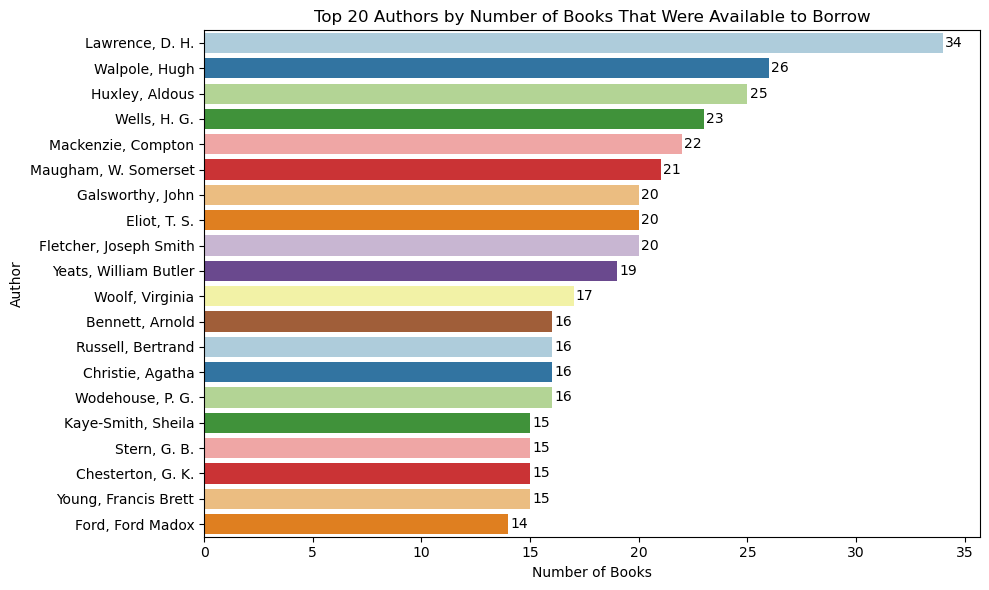

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming sco_books_aut is a pandas DataFrame that you already have

# Group by author and count the number of borrows
total_books = sco_books_aut.groupby(['sco_author']).size()

# Sort the total books in descending order
sorted_total_books = total_books.sort_values(ascending=False)

# Get the top 20 authors by number of borrows
top_20_total_duplicates = sorted_total_books.head(20)

# Calculate the percentage relative to all borrows
total_borrows = total_books.sum()
top_20_percentages = (top_20_total_duplicates / total_borrows) * 100

# Format the output as requested
formatted_output = [f'{author}: {percentage:.2f}%' for author, percentage in top_20_percentages.items()]
for line in formatted_output:
    print(line)

# Plotting the top 20 authors by number of books available to borrow
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_total_duplicates.values, y=top_20_total_duplicates.index, palette='Paired', orient='h')

# Add annotations
for index, value in enumerate(top_20_total_duplicates.values):
    plt.text(value + 0.1, index, str(value), ha='left', va='center')

plt.title('Top 20 Authors by Number of Books That Were Available to Borrow')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()

Lawrence, D. H.: 0.97%
Walpole, Hugh: 0.74%
Huxley, Aldous: 0.71%
Wells, H. G.: 0.65%
Mackenzie, Compton: 0.63%
Maugham, W. Somerset: 0.60%
Galsworthy, John: 0.57%
Eliot, T. S.: 0.57%
Fletcher, Joseph Smith: 0.57%
Yeats, William Butler: 0.54%
Woolf, Virginia: 0.48%
Bennett, Arnold: 0.46%
Russell, Bertrand: 0.46%
Christie, Agatha: 0.46%
Wodehouse, P. G.: 0.46%
Kaye-Smith, Sheila: 0.43%
Stern, G. B.: 0.43%
Chesterton, G. K.: 0.43%
Young, Francis Brett: 0.43%
Ford, Ford Madox: 0.40%


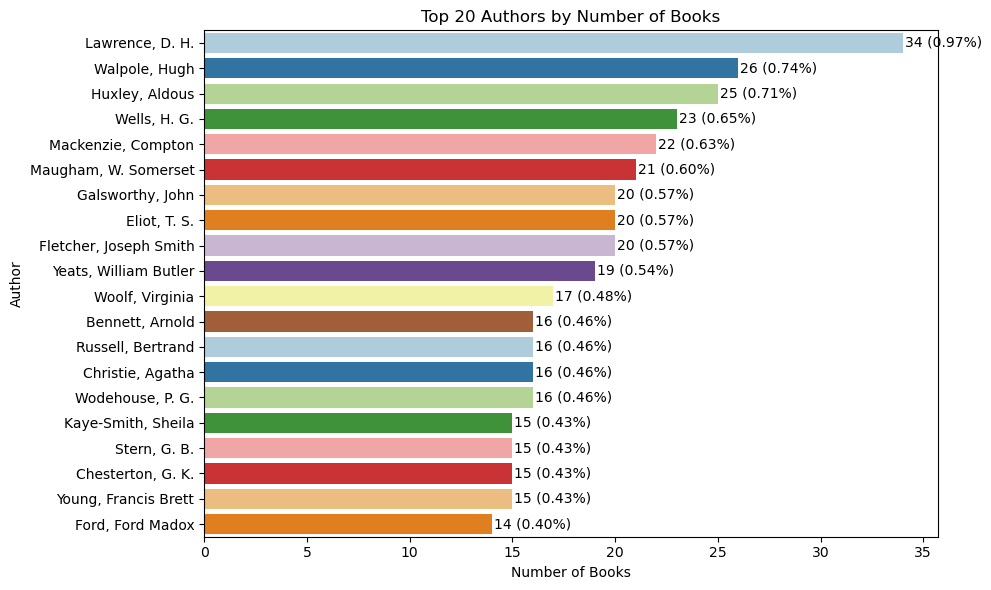

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sco_books_aut is a pandas DataFrame that you already have

# Group by author and count the number of books
total_books = sco_books_aut.groupby(['sco_author']).size()

# Sort the total books in descending order
sorted_total_books = total_books.sort_values(ascending=False)

# Get the top 20 authors by number of books
top_20_total_books = sorted_total_books.head(20)

# Calculate the percentage relative to all books
total_books_count = total_books.sum()
top_20_percentages = (top_20_total_books / total_books_count) * 100

# Format the output as requested
formatted_output = [f'{author}: {percentage:.2f}%' for author, percentage in top_20_percentages.items()]
for line in formatted_output:
    print(line)

# Plotting the top 20 authors by number of books
plt.figure(figsize=(10, 6))
sns.barplot(x=top_20_total_books.values, y=top_20_total_books.index, palette='Paired', orient='h')

# Add annotations
for index, value in enumerate(top_20_total_books.values):
    plt.text(value + 0.1, index, f'{value} ({top_20_percentages.values[index]:.2f}%)', ha='left', va='center')

plt.title('Top 20 Authors by Number of Books')
plt.xlabel('Number of Books')
plt.ylabel('Author')
plt.tight_layout()
plt.show()